In [21]:
pip install opendatasets

In [22]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import pandas as pd
import opendatasets as od


In [17]:
 od.download("https://www.kaggle.com/datasets/maitridsavla/alzimer-segmented")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: johngithiyon
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/maitridsavla/alzimer-segmented


100%|██████████| 32.4M/32.4M [00:00<00:00, 1.05GB/s]

In [26]:
data_dir = "/content/alzimer-segmented/segmented_images/train"

In [27]:
train_data = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [28]:
train_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical",subset="training")

Found 4098 images belonging to 4 classes.


In [29]:
val_gen = train_data.flow_from_directory(data_dir,target_size=(150,150),batch_size=32,class_mode="categorical", subset="validation")

Found 1023 images belonging to 4 classes.


In [30]:
model = keras.Sequential([layers.Conv2D(16,3,padding="same",activation="relu",input_shape=(150,150,3)),
                          layers.MaxPooling2D((2,2)),
                          layers.Conv2D(32,3,padding="same",activation="relu"),
                          layers.MaxPooling2D((2,2)),
                          layers.Flatten(),
                          layers.Dense(128,activation="relu"),
                          layers.Dense(4,activation="softmax")])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 43808)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     5,607,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,613,156 (21.41 MB)

 Trainable params: 5,613,156 (21.41 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
class_indices = train_gen.class_indices
class_names = list(class_indices.keys())
print(class_indices)
print(class_names)

{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [33]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [35]:
model.fit(train_gen,epochs=5,validation_data=val_gen,batch_size=32)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 537ms/step - accuracy: 0.5044 - loss: 1.0684

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 77s 579ms/step - accuracy: 0.5049 - loss: 1.0675 - val_accuracy: 0.4360 - val_loss: 1.1710
Epoch 2/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 77s 592ms/step - accuracy: 0.7079 - loss: 0.7094 - val_accuracy: 0.4526 - val_loss: 1.2970
Epoch 3/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 78s 606ms/step - accuracy: 0.8432 - loss: 0.4171 - val_accuracy: 0.3793 - val_loss: 1.6124
Epoch 4/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 84s 655ms/step - accuracy: 0.9150 - loss: 0.2494 - val_accuracy: 0.4848 - val_loss: 1.4932
Epoch 5/5
129/129 ━━━━━━━━━━━━━━━━━━━━ 75s 580ms/step - accuracy: 0.9603 - loss: 0.1298 - val_accuracy: 0.5249 - val_loss: 1.5139


In [36]:
model.save('/content/alzimer-segmented/alzimer.h5')

In [37]:
model = load_model('/content/alzimer-segmented/alzimer.h5')
print("Model Loaded")

Model Loaded


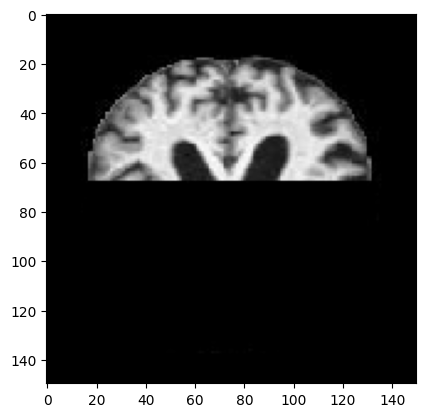

In [38]:
test_image = image.load_img("/content/alzimer-segmented/segmented_images/test/MildDemented/26 (19).jpg",target_size=(150,150))
plt.imshow(test_image)
plt.axis()
plt.show()

In [39]:
img_array = image.img_to_array(test_image)
img_array = np.expand_dims(img_array,axis=0)
img_array/=255

In [46]:
prediction = model.predict(img_array)
ind = np.argmax(prediction)
prediction = prediction[0][ind]
print(prediction)
print(class_names[ind])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
0.50283784
VeryMildDemented
